# Author  : Sarthak Kumar Rath

# Data Science Internship @LetsGrowMore


# Iris Flower Classification ML Project

# Beginner Level Task(01)

# importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
#there is a column "Id" whcih is not needed any futhur....so lets drop it

df = df.drop(columns =["Id"])

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.shape

(150, 5)

In [8]:
#disply the stats about data

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
#lets check the basic info about datatypes present in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
#lets check the number of  samples on each class
df["Species"].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the dataset

In [11]:
#lets check the null value

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

it is seen that there is no null values in the datasets

# Exploratory Data Analysis

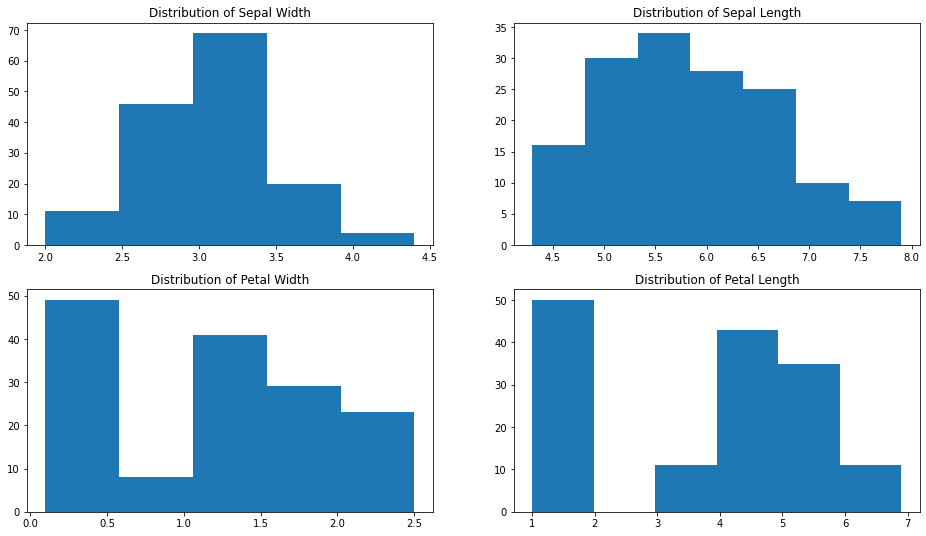

In [12]:
#lets plot histogram for SepalLengthCm

fig, axes = plt.subplots(2, 2, figsize=(16,9))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['SepalLengthCm'], bins=7);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['PetalLengthCm'], bins=6);

The Highest frequency of sepal width is between 3.0 to 3.5 which is around 70.
The Highest frequency of sepal length is between 5.5 and 6.0 which is around 35.
The Highest frequency of petal width is between 0 to 0.5 which is around 50.
The Highest frequency of petal length is between 0 to 0.5 which is around 50.

In [13]:
#scatteplot


Let's compare the sepal length and sepal width columns.
lets compare on the basis on species as well.

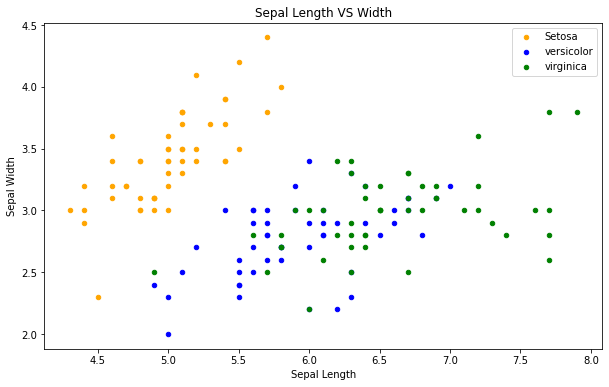

In [14]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.

Let's compare the petal length and petal width columns.

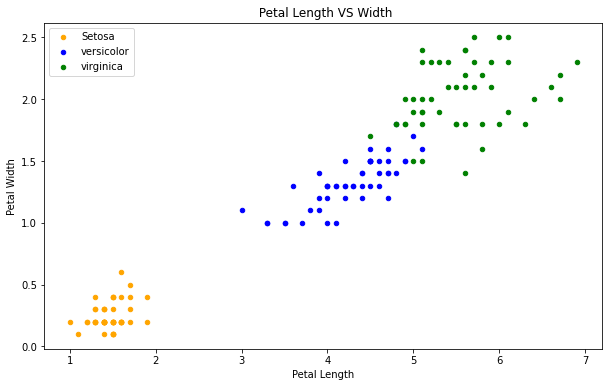

In [15]:
fig = df[df.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

We see that setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.

BoxPlots

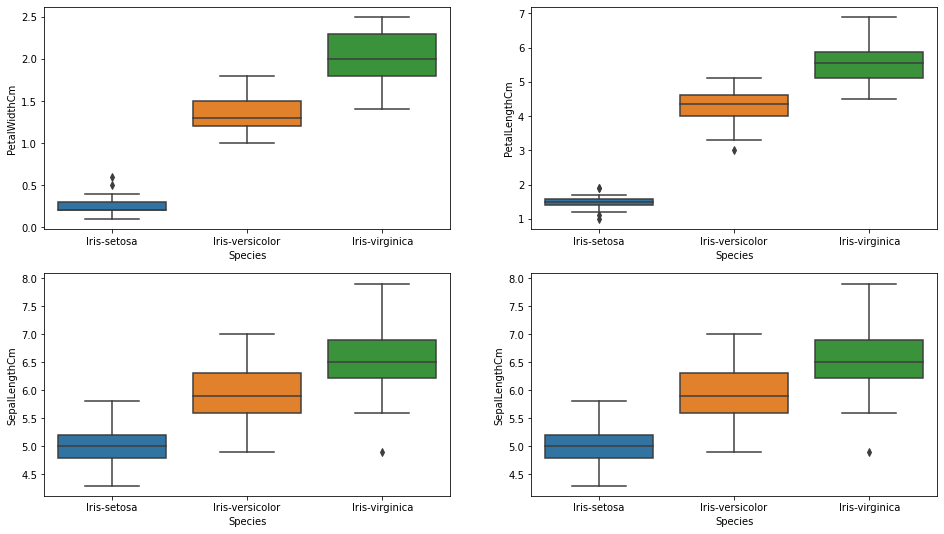

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(  y="PetalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
sns.boxplot(  y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

Further, we see that the box plots describe that the setosa usually has smaller features with few outliers.
The Versicolor species has average features
The virginica species has the longest features widths and lengths as compared to others.

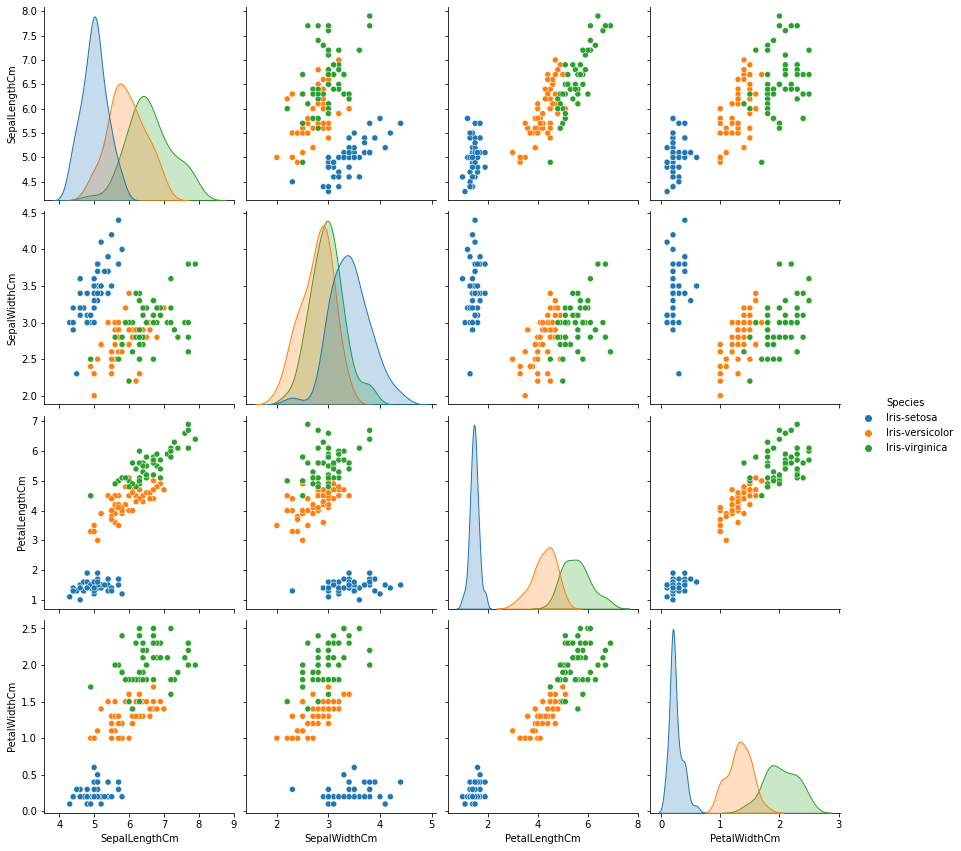

In [17]:
sns.pairplot(df, hue="Species", size=3)

Pair plot represents the relationship between our target and the variables. We can see that the setosa species has a large difference in its characteristics when compared to the other species, it has smaller petal width and length while its sepal width is high and its sepal length is low. Similar kind of conclusions can be drawn for the other species like the Versicolor species usually have average dimensions whether it is sepal or pedal. While virginica has high pedal width and length while it has small sepal width but large sepal length.

CategoricalPlot

<Figure size 1080x1080 with 0 Axes>

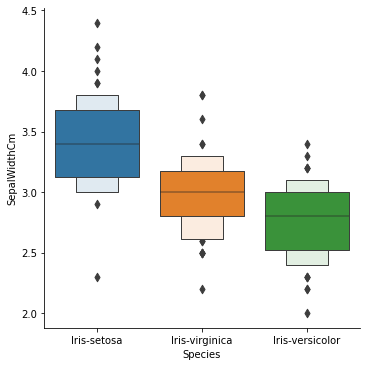

In [18]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

ViolinPlot

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

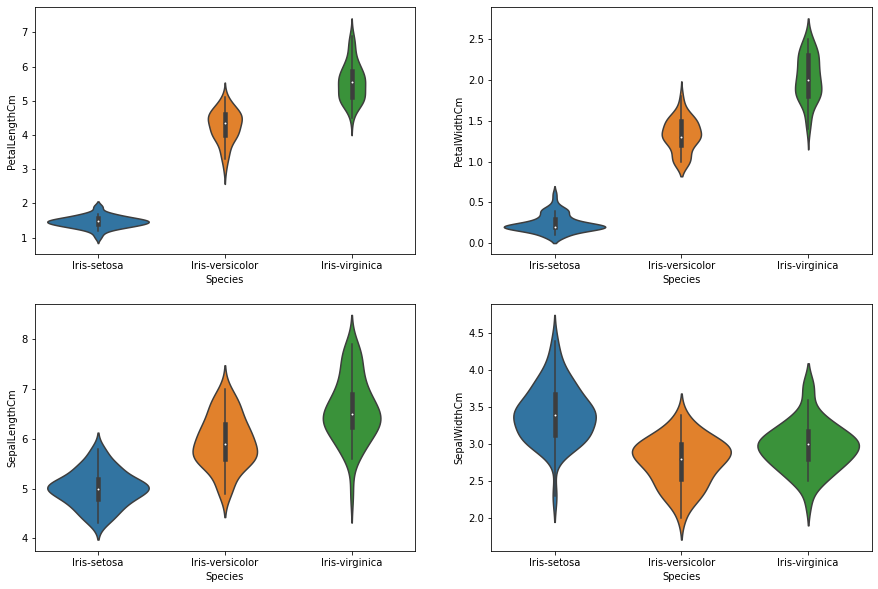

In [19]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

The kernel density of the data along with the full distribution of the data is shown through the violin plots. We can see the probability density of the various features.

# Coorelation Matrix

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. The value is in the range of -1 to 1. If two varibles have high correlation, we can neglect one variable from those two.

In [20]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

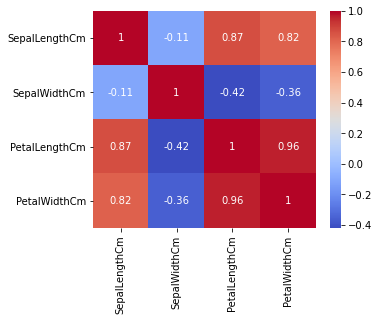

In [21]:
corr = df.corr()
fig,ax = plt.subplots(figsize =(5,4))
sns.heatmap(corr,annot=True,ax=ax,cmap = "coolwarm")

From the above heatmap, we see that petal_length and petal_width have a high correlation, petal_width and sepal_length have good correlation as well as petal_length and sepal_length have good correlations.

# Label Encoder


In machine learning, we usually deal with datasets which contains multiple labels in one or more than one columns. These labels can be in the form of words or numbers. Label Encoding refers to converting the labels into numeric form so as to convert it into the machine-readable form

In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [23]:
df["Species"]= le.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ["Species"])
Y = df["Species"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

# Logistic Regression

In [25]:
#Logistic regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [26]:
#model training
model.fit(x_train,y_train)

LogisticRegression()

In [27]:
#print metric to get performance

print("Accuracy : ",model.score(x_test,y_test)*100)

Accuracy :  93.33333333333333


# K-Nearest-Neighbours

In [28]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [29]:
model.fit(x_train,y_train)


KNeighborsClassifier()

In [30]:
print("Accuracy  : ", model.score(x_test,y_test)*100)

Accuracy  :  93.33333333333333


# Decission tree classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier()

model.fit(x_train,y_train)

pred = model.predict(x_test)

print("Accuracy :" ,model.score(x_test,y_test)*100)

Accuracy : 93.33333333333333
